Index (Delete/re-word at last)

1. Data Pre-processing
    1. Select only monetary columns
    2. Handle nulls
2. Data Exploration
    1. Data correlation and drop the unrelated rows
    2. Range of each column
3. Modelling
    1. Order by date column and drop it
    2. Train_test split by taking initial few weeks
    3. Train the model
    4. Testing
4. Conclusion
    1. Conclusion
    2. Next steps recommendation (consider seasonality, holidays, impression & views, etc)

In [1]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

# 1. Data Pre-processing

Dataset Source: [Robyn](https://github.com/facebookexperimental/Robyn)

The dataset consists of 208 weeks of revenue having.

1. 5 media spend channels: tv_S, ooh_S, print_S, facebook_S, search_S
2. 2 media channels that have also the exposure information (Impression, Clicks): facebook_I, search_clicks_P
3. Organic media without spend: newsletter
4. Control variables: events, holidays, competitor sales (competitor_sales_B)

In [2]:
#Read the csv file
#df=pd.read_csv("/content/drive/MyDrive/01. CUB Courses/01. DTSC 5301- Data Science as a Field /01. Project/00 Data/Robyn_dt_simulated_weekly.csv")
df=pd.read_csv("Robyn_dt_simulated_weekly.csv")
df.sample(5)

,Unnamed: 0,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
125,126,2018-04-16,9.500150e+05,0.0,0,0.000000,2.101131e+07,50425.565260,37300,3167512,63397.814352,na,21616.000000
61,62,2017-01-23,2.179918e+06,0.0,0,80857.333333,8.675806e+07,61384.373539,52500,6998027,195073.842081,na,13998.000000
49,50,2016-10-31,2.974772e+06,704960.9,0,0.000000,7.176559e+07,34659.923981,36700,8937615,192222.857397,na,13989.000000
0,1,2015-11-23,2.754372e+06,167687.6,0,95463.666667,7.290385e+07,0.000000,0,8125009,228213.987444,na,19401.653846
50,51,2016-11-07,2.826128e+06,0.0,267379,86578.666667,6.403331e+07,42223.992695,31200,8832206,208648.339566,na,29426.000000


In [4]:
# Lowering the column headings to have a consitent format
df.columns= df.columns.str.lower()
df_selected= df[['date','tv_s','ooh_s','print_s','search_s','facebook_s','revenue']]
df_selected.head()

Our goal of is to only estimate media spends to achieve the revenue goal, so select only the required columns

The dataset does not have any null entires

# 02. Data Exploration (WIP)

<AxesSubplot:>

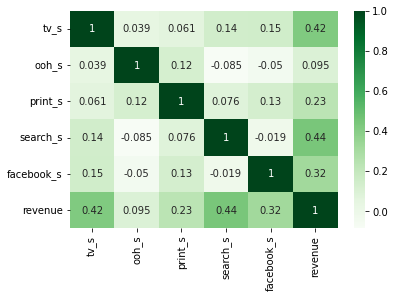

In [7]:
#Check the relationship (correlation) between the columns

sns.heatmap(df_selected.corr(), annot=True, cmap='Greens')

* Spends in TV and Search channels have the high impact (correlation) on revenue
* Out Of Home (OOH) advertising spends have the lowest impact on the revenue

# 3. Modelling

In [13]:
# Next steps recommendation

df_selected

,date,tv_s,ooh_s,print_s,search_s,facebook_s,revenue
0,2015-11-23,167687.6,0,95463.666667,0,228213.987444,2.754372e+06
1,2015-11-30,214600.9,0,0.000000,31000,34258.573511,2.584277e+06
2,2015-12-07,0.0,248022,3404.000000,28400,127691.261335,2.547387e+06
3,2015-12-14,625877.3,0,132600.000000,31900,84014.720306,2.875220e+06
4,2015-12-21,0.0,520005,0.000000,27100,20687.478156,2.215953e+06
...,...,...,...,...,...,...,...
203,2019-10-14,0.0,60433,153723.666667,112100,0.000000,2.456240e+06
204,2019-10-21,154917.6,0,0.000000,103700,133624.575524,2.182825e+06
205,2019-10-28,21982.5,14094,17476.000000,114700,0.000000,2.377707e+06
206,2019-11-04,22453.0,0,24051.333333,134100,0.000000,2.732825e+06


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X = df_selected[['tv_s', 'ooh_s', 'print_s', 'search_s', 'facebook_s']]
y = df_selected['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 288426479242.19617
R-squared (R2): 0.3123289781480262


# Pending tasks

* The model's accuracy (R2) is poor, improve it
  * Try normalization?
  * Try different regression technique?
  * Do more feature engineering?
* Convert it as a report with detailed explanation of the following:
  * Problem statement trying to answer?
  * Add possible source of bias
  * Data source and description of the columns
  * Add more visualizations (either in the data exploration part or as result comparisions)
  * Complete the conclusion
* Check the data, code and report in github
  * Have a readme file explaining how to run the code
* Publish the report in github

# Personal To-do (Do if time permits, not requred for this project though)

* Leran what is multiple regression and the math behind it.
* Learn how to interpret the regression equation result (for example, which input variable influence how much the target variable)
* Learn how to evaluate a regression model (r2 score, MSE, RMSE, MAE? When to use what)
